In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
bank_data=pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv',sep=';')

In [ ]:
bank_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
# prompt: change the column y element yes=1 and no=0 with map

bank_data['y'] = bank_data['y'].map({'yes':1,'no':0})

In [ ]:
bank_data_encoded=pd.get_dummies(bank_data,drop_first=True)
bank_data_encoded.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0  ...       True      False   
3          -36.4      4.857       5191.0  ...       True      False   
4          -36.4      4.857       5191.0  ...       True      False   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False             True            False            False   
1      False      False             True            False            False   
2      False      False             True            False            False   
3      False      False             True            False            False   
4      False      False             True            False            False   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  
0            False                  True             False  
1            False                  True             False  
2            False                  True             False  
3            False                  True             False  
4            False                  True             False  

[5 rows x 54 columns]

In [ ]:
x=bank_data_encoded.drop('y',axis=1)
y=bank_data_encoded['y']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.65      0.49      0.56       935

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238

0.9119932022335518


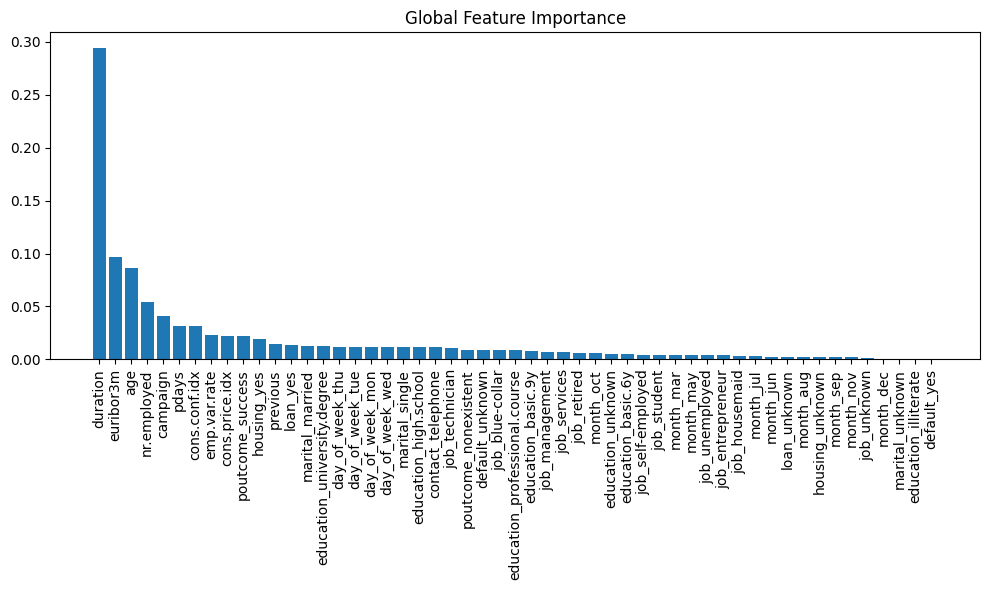

In [ ]:
importances = model.feature_importances_
feature_names = x.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Global Feature Importance")
plt.bar(range(x.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(x.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
feature_names = x.columns
explainer = LimeTabularExplainer(X_train.values,training_labels=y_train.values, feature_names=feature_names,class_names=["no","yes"], mode='classification')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation for Observation #4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


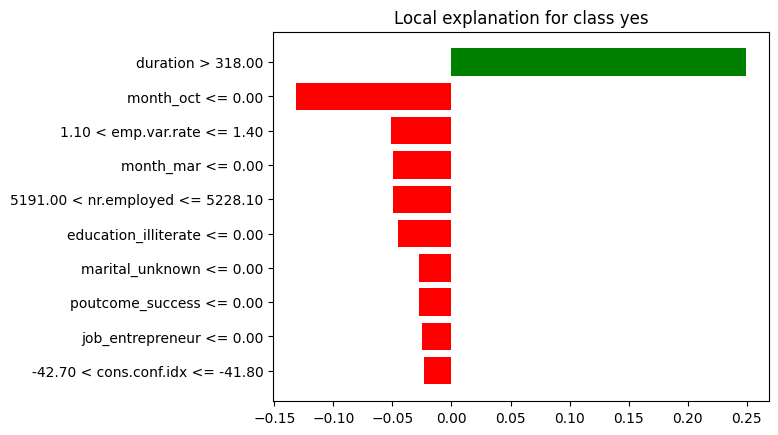

Explanation for Observation #20


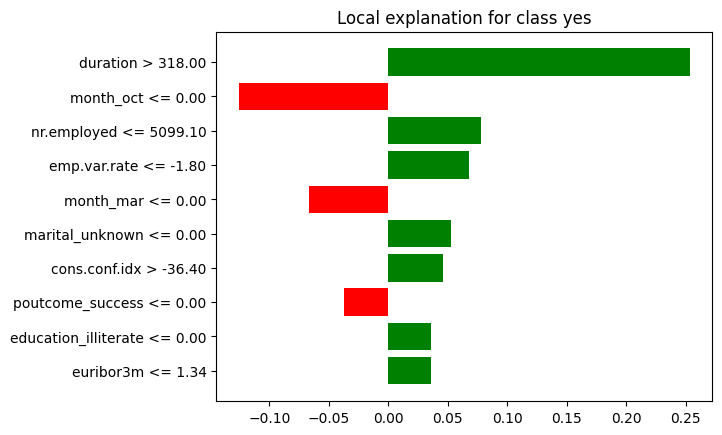

In [ ]:
obs_4 = X_test.iloc[3].values
obs_20 = X_test.iloc[19].values

exp_4 = explainer.explain_instance(obs_4, model.predict_proba, num_features=10)
exp_20 = explainer.explain_instance(obs_20, model.predict_proba, num_features=10)

print("Explanation for Observation #4")
exp_4.show_in_notebook()
exp_4.as_pyplot_figure()
plt.show()

print("Explanation for Observation #20")
exp_20.show_in_notebook()
exp_20.as_pyplot_figure()
plt.show()